# Amazon Products Sales Dataset 2023

### Merging Files into one file 

In [1]:
import os
import pandas as pd

# Directory containing CSV files
input_dir = 'Amazon Products Sales Dataset 2023/'

# Get a list of all CSV files in the input directory
csv_files = [f for f in os.listdir(input_dir) if f.endswith('Air_Conditioners.csv')]

# Read each CSV file and append its contents to a DataFrame
df = pd.DataFrame()
for file in csv_files:
    temp_df = pd.read_csv(os.path.join(input_dir, file))
    df = pd.concat([df, temp_df])

# Save the concatenated DataFrame to a new CSV file
output_file = 'Amazon_Products.csv'
df.to_csv(output_file, index=False)


In [8]:
df = pd.read_csv('Amazon_Products.csv')
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


to use Multiple Imputation by Chained Equations (MICE) for imputing missing values in a dataset, let's install the fancyimpute library  

In [3]:
!pip install fancyimpute
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


 import the necessary libraries and load a sample dataset with some missing values

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from fancyimpute import IterativeImputer

# Load sample dataset with missing values
df = pd.read_csv("Amazon_Products.csv")


Then we check how many missing values we have in the dataset

In [5]:
print(df.isnull().sum())

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           287
no_of_ratings     287
discount_price    263
actual_price      220
dtype: int64


In [6]:
# a sample DataFrame
data = {'name': ['Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1 Convertible, Copper, Anti-Viral + Pm 2.5 Filter, 2023 Model, White, Gls18I3...',
                 'Samsung 1.5 Ton 5 Star Inverter Split AC (Alloy, AR18TY5QAWKNNA, White)',
                 '1.53512.52023183...']}
df = pd.DataFrame(data)

# define a function to convert a string to float
def string_to_float(x):
    # remove all non-numeric characters and spaces from the string
    cleaned_string = ''.join(filter(str.isdigit, x.replace('.', '', 1)))
    # replace any remaining dots with a single dot
    cleaned_string = cleaned_string.replace('.', '', cleaned_string.count('.') - 1)
    # convert to float
    return float(cleaned_string)

# apply the function to the 'name' column
df['name'] = df['name'].apply(string_to_float)

# print the updated DataFrame
print(df)


           name
0  1.535125e+13
1  1.551850e+05
2  1.535125e+13


We can see that several columns have missing values. Now, let's impute the missing values using MICE

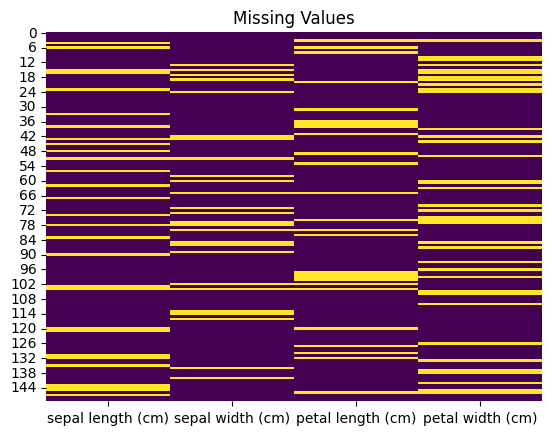

Imputing row 1/150 with 0 missing, elapsed time: 0.005
Imputing row 101/150 with 1 missing, elapsed time: 0.006


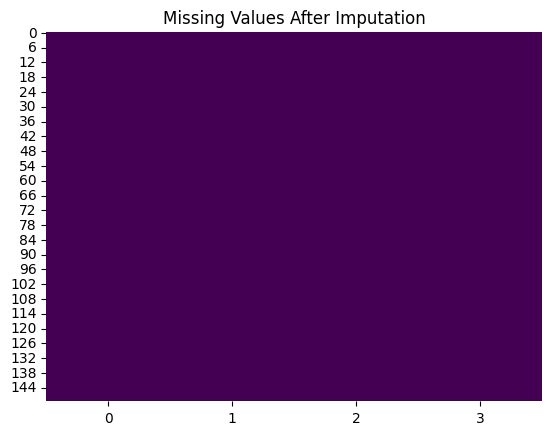

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import KNN # For imputing missing values
from sklearn.datasets import load_iris # For loading iris dataset

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Introduce missing values
np.random.seed(0)
mask = np.random.choice([True, False], size=df.shape, p=[0.2, 0.8])
df = pd.DataFrame(np.where(mask, np.nan, df), columns=df.columns)

# Visualize missingness
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

# Impute missing values using KNN
imputed_df = KNN(k=3).fit_transform(df)

# Visualize missingness after imputation
sns.heatmap(pd.DataFrame(imputed_df).isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values After Imputation')
plt.show()


In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,NaN,NaN
4,NaN,3.6,1.4,0.2
...,...,...,...,...
145,NaN,3.0,5.2,NaN
146,6.3,2.5,NaN,NaN
147,NaN,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
